## Analyse Hauptnutzfläche

In [2]:
import seaborn as sns
import code.importer as im
import code.charts as charts

df = im.get_dataset('dataset/dataset.csv')
filtered_df = im.select_relevant_features(df)

### Allgemein

In [5]:
filtered_df[im.FIELD_AREA_MAIN_USAGE].describe()

count      319.000000
mean      2892.322884
std       3990.132067
min         87.000000
25%        719.500000
50%       1475.000000
75%       3639.000000
max      29437.000000
Name: area_main_usage, dtype: float64

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.

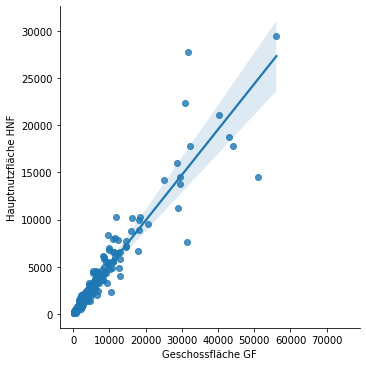

In [2]:
charts.lmplot_gf_hnf(filtered_df)

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF'>

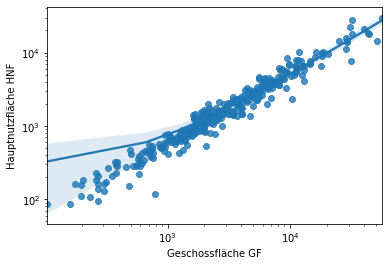

In [3]:
charts.regplot_gf_hnf(filtered_df, logscale=True)

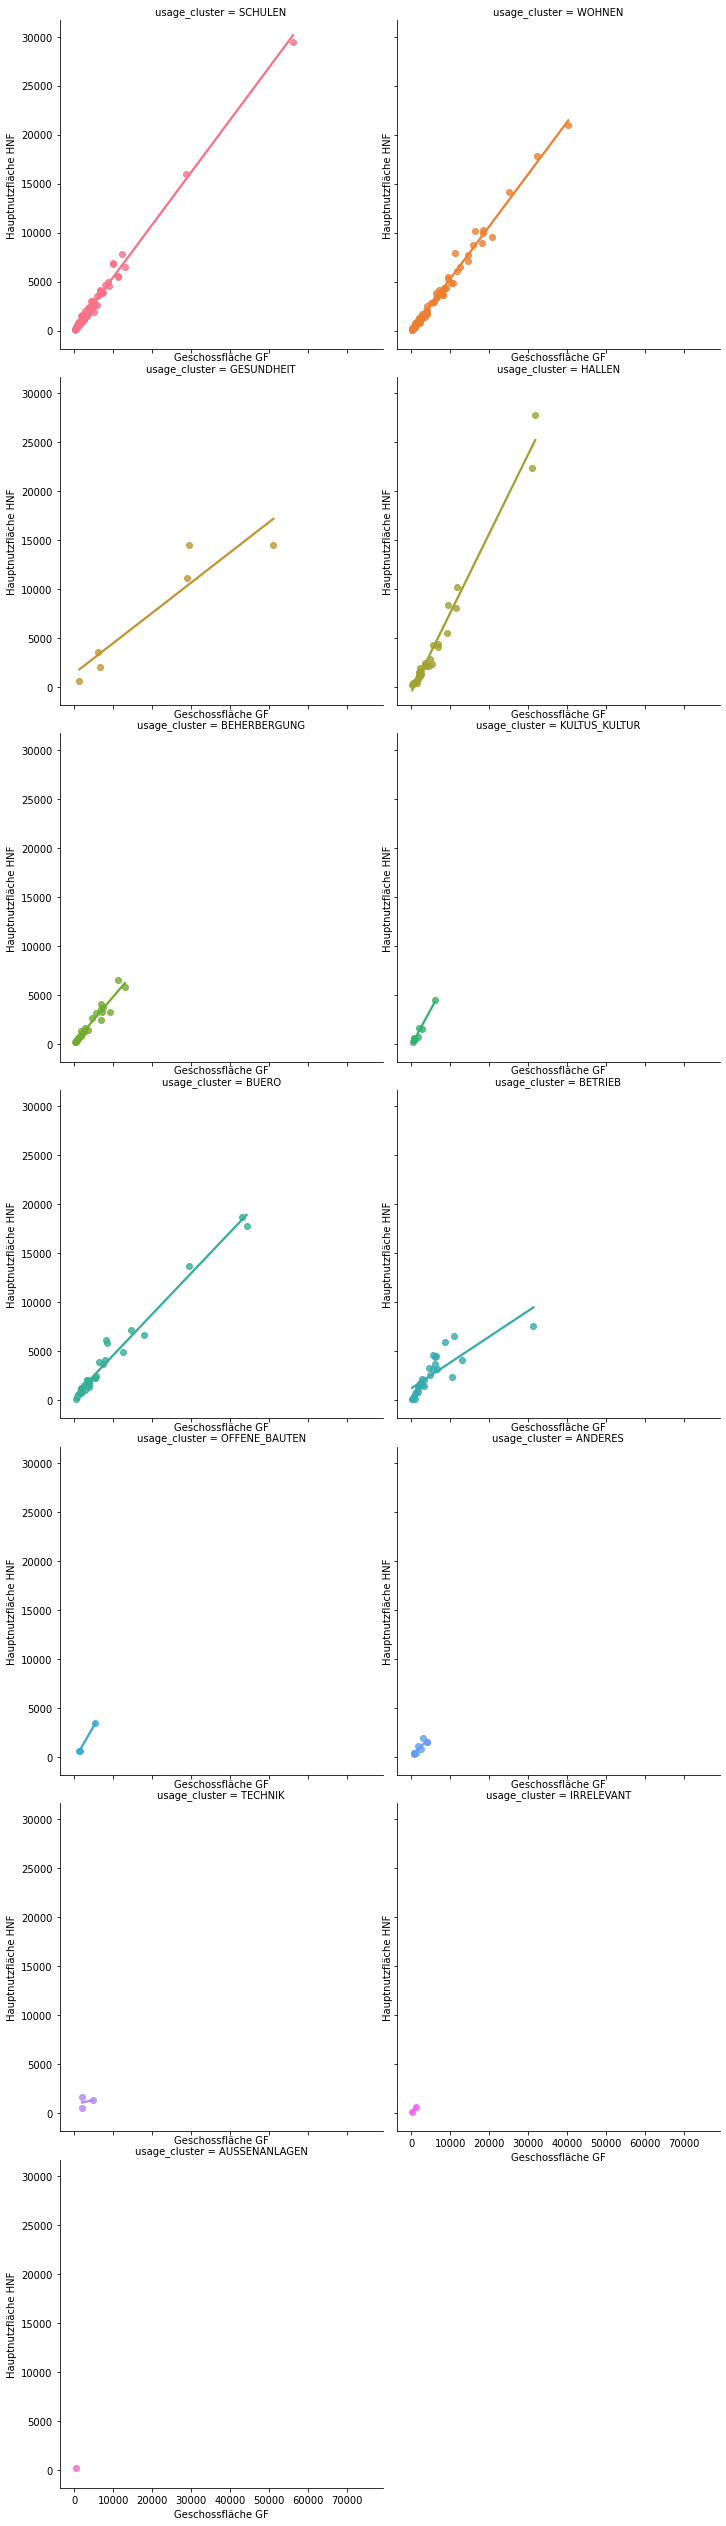

In [4]:
gf = sns.lmplot(
    data=filtered_df,
    x=im.FIELD_AREA_TOTAL_FLOOR_416, y=im.FIELD_AREA_MAIN_USAGE,
    col=im.FIELD_USAGE_CLUSTER,
    hue=im.FIELD_USAGE_CLUSTER,
    ci=None, col_wrap=2,
)

gf.set(xlabel=charts.LABEL_GF, ylabel=charts.LABEL_HNF)